In [319]:
%matplotlib notebook


In [333]:
%matplotlib inline

from scipy.stats import sem, ttest_ind, zscore
from statistics import variance, stdev


In [321]:
#imports
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import wbdata
from pprint import pprint
import requests
import wbpy
c_api = wbpy.ClimateAPI()
import statistics
#setting list of countries
countries_l = ["Aruba",
"Andorra",
"United Arab Emirates",
"Argentina",
"Antigua and Barbuda",
"Australia",
"Austria",
"Belgium",
"Bahrain",
"Bahamas, The",
"Bermuda",
"Barbados",
"Brunei Darussalam",
#"Canada",
"Switzerland",
"Chile",
#"Curacao",
"Cayman Islands",
"Cyprus",
"Czech Republic",
"Germany",
"Denmark",
"Spain",
"Estonia",
"Finland",
"France",
"Faroe Islands",
"United Kingdom",
"Gibraltar",
"Greece",
"Greenland",
"Guam",
"Hong Kong SAR, China",
"Croatia",
"Hungary",
"Isle of Man",
"Ireland",
"Iceland",
"Israel",
"Italy",
"Japan",
"St. Kitts and Nevis",
"Korea, Rep.",
"Kuwait",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"Latvia",
"Macao SAR, China",
#"St. Martin (French part)",
"Monaco",
"Malta",
"Northern Mariana Islands",
"New Caledonia",
"Netherlands",
"Norway",
"New Zealand",
"Oman",
"Panama",
"Palau",
"Poland",
"Puerto Rico",
"Portugal",
"French Polynesia",
"Qatar",
"Saudi Arabia",
"Singapore",
"San Marino",
"Slovak Republic",
"Slovenia",
"Sweden",
#"Sint Maarten (Dutch part)",
"Seychelles",
"Turks and Caicos Islands",
"Trinidad and Tobago",
"Taiwan, China",
"Uruguay",
"United States",
"British Virgin Islands",
"Virgin Islands (U.S.)"]


In [281]:
#putting list of iso codes and commenting out those without data
iso_and_basin_codes = ['ABW',
 'AND',
 'ARE',
 'ARG',
 'ATG',
 'AUS',
 'AUT',
 'BEL',
 'BHR',
 'BHS',
 'BMU',
 'BRB',
 'BRN',
# 'CAN',
 'CHE',
# 'CHI',
 'CHL',
 #'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'FRO',
 'GBR',
 'GIB',
 'GRC',
 'GRL',
 'GUM',
 'HKG',
 'HRV',
 'HUN',
 'IMN',
 'IRL',
 'ISL',
 'ISR',
 'ITA',
 'JPN',
 'KNA',
 'KOR',
 'KWT',
 'LIE',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 #'MAF',
 'MCO',
 'MLT',
 'MNP',
 'NCL',
 'NLD',
 'NOR',
 'NZL',
 'OMN',
 'PAN',
 'PLW',
 'POL',
 'PRI',
 'PRT',
 'PYF',
 'QAT',
 'SAU',
 'SGP',
 'SMR',
 'SVK',
 'SVN',
 'SWE',
 #'SXM',
 'SYC',
 'TCA',
 'TTO',
 'TWN',
 'URY',
 'USA',
 'VGB',
 'VIR']

In [85]:
#pulling the data and converting it to dictionary
dataset_temp = c_api.get_instrumental(data_type="tas", interval="year", locations=iso_and_basin_codes)
temp_dict = dataset_temp.as_dict()
temp_dict

{'ABW': {'1901': 27.633335,
  '1902': 27.491665,
  '1903': 27.608334,
  '1904': 27.375,
  '1905': 27.525,
  '1906': 27.483334,
  '1907': 27.375,
  '1908': 27.55,
  '1909': 27.375,
  '1910': 27.4,
  '1911': 27.45,
  '1912': 27.591665,
  '1913': 27.291666,
  '1914': 27.391666,
  '1915': 28.133335,
  '1916': 27.666666,
  '1917': 27.258335,
  '1918': 27.2,
  '1919': 27.375,
  '1920': 27.408335,
  '1921': 27.166666,
  '1922': 27.033335,
  '1923': 27.225,
  '1924': 27.616665,
  '1925': 27.341665,
  '1926': 27.866665,
  '1927': 27.158335,
  '1928': 27.433334,
  '1929': 27.441666,
  '1930': 27.441666,
  '1931': 27.891666,
  '1932': 27.616665,
  '1933': 28.366665,
  '1934': 28.375,
  '1935': 28.175,
  '1936': 28.325,
  '1937': 27.958334,
  '1938': 27.816666,
  '1939': 27.95,
  '1940': 28.666666,
  '1941': 28.85,
  '1942': 28.4,
  '1943': 28.175,
  '1944': 27.891666,
  '1945': 27.625,
  '1946': 27.741665,
  '1947': 28.375,
  '1948': 27.65,
  '1949': 27.25,
  '1950': 27.05,
  '1951': 27.925,
  '1

In [268]:
#making list that will populate dataframe
year = ["1995", "2000", "2005", "2009"]
temp = []
probyear = []
for i in iso_and_basin_codes:
    for y in year:
        temp.append(temp_dict[i][y])
temp

[28.608334,
 28.258335,
 28.0,
 28.275,
 9.433333,
 9.460417,
 8.710417,
 9.627084,
 26.997562,
 27.562805,
 27.262806,
 27.643091,
 14.012433,
 13.560453,
 14.040006,
 14.451981,
 26.9625,
 26.7875,
 26.720835,
 26.320835,
 21.480915,
 21.24332,
 22.352182,
 21.92194,
 6.8737564,
 8.014925,
 6.439801,
 7.478607,
 10.541358,
 10.900618,
 10.618827,
 10.616358,
 27.122915,
 27.858334,
 27.535416,
 28.48125,
 25.411518,
 25.144608,
 25.582844,
 25.7875,
 21.625,
 21.4,
 21.416668,
 21.45,
 26.620834,
 26.25,
 27.3375,
 26.725,
 26.183334,
 26.386906,
 26.390476,
 26.338095,
 6.414693,
 7.233114,
 6.2776318,
 6.8809214,
 7.9698286,
 7.735063,
 8.052638,
 8.097851,
 27.65,
 27.475,
 27.533335,
 27.325,
 18.835001,
 19.403334,
 19.386667,
 19.735834,
 8.228611,
 9.492361,
 8.024167,
 8.8475,
 9.095997,
 10.041376,
 9.148071,
 9.445124,
 8.386667,
 9.023939,
 8.720606,
 8.902425,
 14.865692,
 14.391164,
 14.248523,
 14.812146,
 6.3325,
 7.170333,
 6.267333,
 6.1801667,
 2.1345768,
 3.2470634

In [87]:
#making a multilayerd index
iterables = [countries_l, year]
index = pd.MultiIndex.from_product(iterables, names=['country', 'date'])
#making the Temp dataframe
Temp_df = pd.DataFrame(temp, index=index)
Temp_df = Temp_df.rename(columns={Temp_df.columns[0]:"Temperture in C"})

In [266]:
#making the resources dataframe
countries = [i['id'] for i in wbdata.get_country(incomelevel="HIC", display=False)]
indicators = {"NW.NCA.TO": "Natural Capital","NW.NCA.AGRI.PC": "Agricutural Land per Capital","NW.TOW.PC": "Wealth per Capita"}
df_Nat_Cap = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
df_Nat_Cap.head()

Natural Capital  Agricutural Land per Capital  \
country              date                                                  
United Arab Emirates 2014     2.357202e+12                   1818.430457   
                     2010     1.950883e+12                   1868.955312   
                     2005     1.255220e+12                   2805.459285   
                     2000     8.018936e+11                   4781.142929   
                     1995     7.165219e+11                   4363.626269   

                           Wealth per Capita  
country              date                     
United Arab Emirates 2014       7.382704e+05  
                     2010       6.728036e+05  
                     2005       9.929800e+05  
                     2000       1.196284e+06  
                     1995       1.296028e+06

In [335]:
#changing 2009 to 2010
Temp_alt_df = Temp_df.reset_index()
for c in range(len(Temp_alt_df["country"])):
    if Temp_alt_df.loc[c,'date'] == "2009":
        Temp_alt_df.loc[c,'date'] = "2010"
Temp_alt_df = Temp_alt_df.set_index(["country","date"])
#Temp_alt_df

In [337]:
#leaving out 2014
Resources_df = df_Nat_Cap.reset_index()
Resources_df = Resources_df[Resources_df['date'] != '2014']
Resources_df = Resources_df.set_index(["country","date"])
#Resources_df



In [389]:
#merging dataframes
combined_df = Temp_alt_df.join(Resources_df, how='inner')
combined_df.head()

Temperture in C  Natural Capital  \
country   date                                     
Argentina 1995        14.012433     3.568115e+11   
          2000        13.560453     3.882977e+11   
          2005        14.040006     6.468200e+11   
          2010        14.451981     7.516620e+11   
Australia 1995        21.480915     1.798999e+12   

                Agricutural Land per Capital  Wealth per Capita  
country   date                                                   
Argentina 1995                   5758.312255      101364.379755  
          2000                   5810.929061      116973.340999  
          2005                   9950.871248      108954.015777  
          2010                   9980.751465      126328.788468  
Australia 1995                  14840.028438      688270.627163

In [371]:
combined_df = combined_df.round(2)

In [372]:
combined_df.describe()

,Temperture in C,Natural Capital,Agricutural Land per Capital,Wealth per Capita
count,168.000000,1.680000e+02,168.000000,1.680000e+02
mean,13.307857,5.004962e+11,4978.403333,5.087677e+05
std,7.719240,1.132684e+12,3837.797419,3.583256e+05
min,1.180000,1.441589e+08,13.300000,7.574532e+04
25%,8.010000,3.654777e+10,2787.597500,2.101824e+05
50%,10.880000,1.201645e+11,4111.040000,4.525988e+05
75%,17.795000,4.326295e+11,5684.750000,6.932679e+05
max,28.480000,7.569850e+12,26220.260000,1.499655e+06


In [373]:
combined_temp = combined_df.iloc[:,0]
combined_nat_cap= combined_df.iloc[:,1]
combined_agr_cap= combined_df.iloc[:,2]
combined_wel_cap= combined_df.iloc[:,3]

In [374]:
#statistical summary
def summarize(title, arr):
    print(f"Summarizing {title}")
    print(f"Variance: {variance(arr)}")
    print(f"Standard Deviation: {stdev(arr)}")
    #print(f"Z-Scores: {zscore(arr)}")
    print("======")

In [375]:
summarize("Temperture in C", combined_temp)
summarize("Natural Capital", combined_nat_cap)
summarize("Agricutural Land per Capital", combined_agr_cap)
summarize("Wealth per Capita", combined_wel_cap)

Summarizing Temperture in C
Variance: 59.586663644140295
Standard Deviation: 7.719239835899666
Summarizing Natural Capital
Variance: 1.282973045219035e+24
Standard Deviation: 1132684000601.6838
Summarizing Agricutural Land per Capital
Variance: 14728689.028478643
Standard Deviation: 3837.797418895198
Summarizing Wealth per Capita
Variance: 128397262797.37096
Standard Deviation: 358325.6379292039


In [391]:



#ttest on combined data that represented by 42 countries

combined_temp_means = np.mean(combined_temp)
combined_temp_sem = sem(combined_temp)


combined_wealth_means = np.mean(combined_wel_cap)
combined_wealth_sem = sem(combined_wel_cap)


com_means = [combined_temp_means, combined_wealth_means]
com_sems = [combined_temp_sem, combined_wealth_sem]


labels = ["Temperatures in C", "Wealth Capita"]

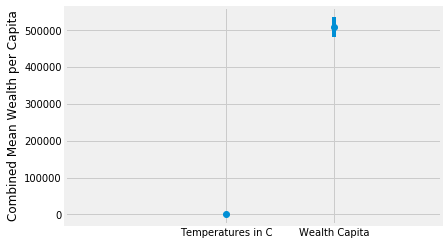

In [392]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(com_means)), com_means, yerr=com_sems, fmt="o" )

ax.set_xlim(-1.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1, 2,])

ax.set_ylabel('Combined Mean Wealth per Capita')


plt.show()

In [398]:
#Temp vs. Wealth per Capita
(t_stat, p) = ttest_ind(combined_temp, combined_wel_cap, equal_var=False)
(t_stat, p)

(-18.40284176974873, 5.012140392719792e-42)

In [399]:
#Temp vs. Agricultural Land per Capital
(t_stat, p) = ttest_ind(combined_temp, combined_agr_cap, equal_var=False)
(t_stat, p)

(-16.76869710571865, 1.2284075461500156e-37)

In [400]:
#Temp vs. Natural Capital
(t_stat, p) = ttest_ind(combined_temp, combined_nat_cap, equal_var=False)
(t_stat, p)

(-5.727256979185965, 4.643979149717865e-08)

In [ ]:



#Linear Regression Analysis on combined data (whole data set), comment out the plots to see the slope




In [ ]:
combined_temp = combined_df.iloc[:,0]
combined_nat_cap= combined_df.iloc[:,1]
combined_agr_cap= combined_df.iloc[:,2]
combined_wel_cap= combined_df.iloc[:,3]

In [403]:

cnc_slope, cnc_int, cnc_r, cnc_p, cnc_std_err = stats.linregress(
    combined_temp, combined_nat_cap)
cnc_fit = cnc_slope * combined_temp + cnc_int


cag_slope, cag_int, cag_r, cag_p, cag_std_err = stats.linregress(
    combined_temp, combined_agr_cap)
cag_fit = cag_slope * combined_temp + cag_int


cwe_slope, cwe_int, cwe_r, cwe_p, cwe_std_err = stats.linregress(
    combined_temp, combined_wel_cap)
cwe_fit = cwe_slope * combined_temp + cwe_int

Text(0.5,0,'Temperature')

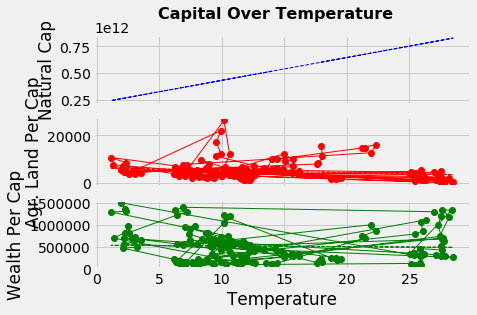

In [491]:
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Capital Over Temperature", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(year), max(year))
#ax1.plot(combined_temp, combined_nat_cap, linewidth=1, marker="o")
ax1.plot(combined_temp, cnc_fit, "b--", linewidth=1)
ax1.set_ylabel("Natural Cap")


ax2.plot(combinded_temp, combined_agr_cap, linewidth=1, marker="o", color="r")
ax2.plot(combinded_temp, cag_fit, "r--", linewidth=1)
ax2.set_ylabel("Agr. Land Per Cap")

ax3.plot(combined_temp, combined_wel_cap, linewidth=1, marker="o", color="g")
ax3.plot(combined_temp, cwe_fit, "g--", linewidth=1)
ax3.set_ylabel("Wealth Per Cap")
ax3.set_xlabel("Temperature")

In [416]:
#59.9 Fahrenheit
temp_prediction = 15.5 
print("If an average annual temperature in celsius is 15.5 Natural Capital will be " +
      str(cnc_slope * temp_prediction + cnc_int) + ".")
print("If an average annual temperature in celsius is 15.5 Agr. Land Per Capital will be " + str(cag_slope * temp_prediction + cag_int) + ".")
print("If an average annual temperature in celsius is 15.5 Wealth per Capita will be " +
      str(cwe_slope * temp_prediction + cwe_int) + ".")



If an average annual temperature in celsius is 15.5 Natural Capital will be 547155532436.15173.
If an average annual temperature in celsius is 15.5 Agr. Land Per Capital will be 4762.2929379660245.
If an average annual temperature in celsius is 15.5 Wealth per Capita will be 505088.7842669911.


In [415]:
#23 Fahrenheit
temp_prediction = -5 
print("If an average annual temperature in celsius is -5 Natural Capital will be " +
      str(cnc_slope * temp_prediction + cnc_int) + ".")
print("If an average annual temperature in celsius is -5 Agr. Land Per Capital will be " + str(cag_slope * temp_prediction + cag_int) + ".")
print("If an average annual temperature in celsius is -5  Wealth per Capita will be " +
      str(cwe_slope * temp_prediction + cwe_int) + ".")



If an average annual temperature in celsius is -5 Natural Capital will be 110817154650.17839.
If an average annual temperature in celsius is -5 Agr. Land Per Capital will be 6783.2666580839095.
If an average annual temperature in celsius is -5  Wealth per Capita will be 539492.0483173934.


In [ ]:
#Scatter of 
combined_temp = combined_df.iloc[:,0]
combined_nat_cap= combined_df.iloc[:,1]
combined_agr_cap= combined_df.iloc[:,2]
combined_wel_cap= combined_df.iloc[:,3]

In [489]:
combinded_wel_cap.describe()

count    1.680000e+02
mean     5.087677e+05
std      3.583256e+05
min      7.574532e+04
25%      2.101824e+05
50%      4.525988e+05
75%      6.932679e+05
max      1.499655e+06
Name: Wealth per Capita, dtype: float64

(-1, 30)

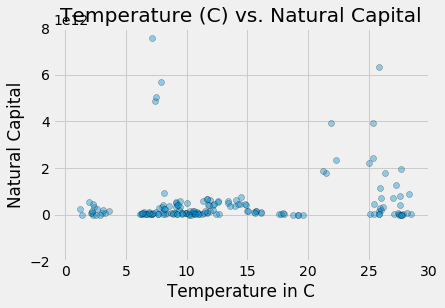

In [488]:
plt.scatter(combined_temp, combined_nat_cap, alpha=0.4, edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Natural Capital")
plt.ylabel("Natural Capital")
plt.xlabel("Temperature in C")
plt.grid(True)
plt.ylim(-2e12, 8e12)
plt.xlim(-1, 30)

(-1, 30)

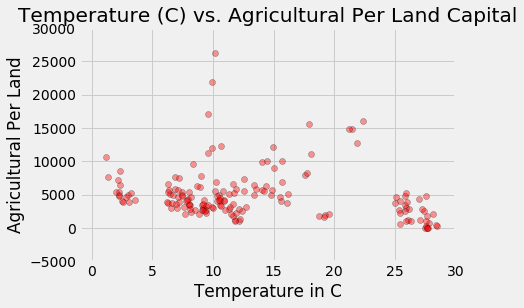

In [486]:
plt.scatter(combined_temp, combined_agr_cap, alpha=0.4, color="red", edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Agricultural Per Land Capital")
plt.ylabel("Agricultural Per Land")
plt.xlabel("Temperature in C")
plt.grid(True)
plt.ylim(-5000, 30000)
plt.xlim(-1, 30)

(-1, 30)

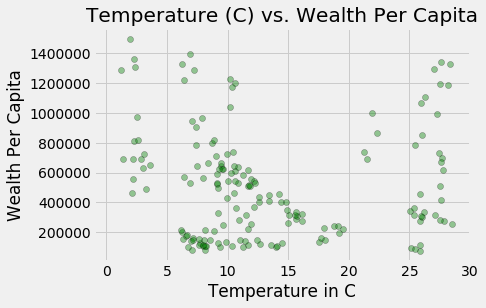

In [490]:
plt.scatter(combined_temp, combined_wel_cap, alpha=0.4, color="green", edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Wealth Per Capita")
plt.ylabel("Wealth Per Capita")
plt.xlabel("Temperature in C")
plt.grid(True)
#plt.ylim(2e3, 30000)
plt.xlim(-1, 30)

In [94]:
#combined_df['Wealth per Capita'] = pd.to_numeric(combined_df['Wealth per Capita'])
#combined_df['Agricutural Land per Capital'] = pd.to_numeric(combined_df['Agricutural Land per Capital'])
#combined_df['Natural Capital'] = pd.to_numeric(combined_df['Natural Capital'])

In [95]:
#Adds commas to data frame
#combined_df['Wealth per Capita'] = combined_df.apply(lambda x: "{:,}".format(x['Wealth per Capita']), axis=1)
#combined_df['Agricutural Land per Capital'] = combined_df.apply(lambda x: "{:,}".format(x['Agricultural Land per Capital']), axis=1)

In [170]:



#Data frame for a specific country
usa_df = pd.DataFrame(combined_df.loc['United States'])

In [421]:
usa_df.describe()


,Temperture in C,Natural Capital,Agricutural Land per Capital,Wealth per Capita
count,4.000000,4.000000e+00,4.000000,4.000000
mean,7.452500,5.805684e+12,4930.665000,901262.412500
std,0.311916,1.227903e+12,586.641815,83039.216237
min,7.100000,4.889032e+12,4268.680000,782762.080000
25%,7.340000,5.014769e+12,4653.700000,876470.657500
50%,7.425000,5.381926e+12,4884.510000,926130.590000
75%,7.537500,6.172841e+12,5161.475000,950922.345000
max,7.860000,7.569850e+12,5684.960000,970026.390000


In [178]:
usa_df.to_csv("../usa.csv", index=False, header=True)

In [100]:
temp = usa_df['Temperture in C']

date
1995    7.42
2000    7.43
2005    7.86
2010    7.10
Name: Temperture in C, dtype: float64

In [423]:
c= combined_df.loc['United States']['Temperture in C']

count    4.000000
mean     7.452761
std      0.310148
min      7.102065
25%      7.340175
50%      7.425601
75%      7.538187
max      7.857778
Name: Temperture in C, dtype: float64

In [422]:
b =combined_df.loc['United States']['Natural Capital']

In [424]:
a = combined_df.loc['United States']['Agricutural Land per Capital']

In [104]:
a

date
1995    4986.98
2000    4782.04
2005    4268.68
2010    5684.96
Name: Agricutural Land per Capital, dtype: float64

In [105]:
b = combined_df.loc['United States']['Wealth per Capita']

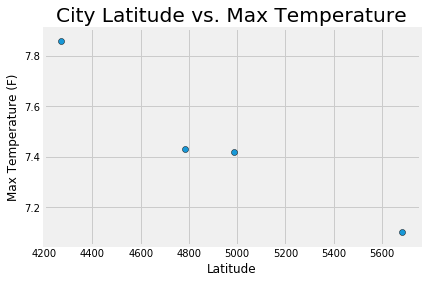

In [425]:
plt.scatter(a, c, alpha=0.9, edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"agr vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#plt.ylim(0, 140)
#plt.xlim(0, 2,000,000)

In [107]:
usa, = plt.plot(a, c, color="blue", label="World Average" )

In [108]:
#Regression Analysis

In [109]:
usa_df = pd.DataFrame(combined_df.loc['United States'])

In [110]:
#usa_df['Wealth per Capita'] = usa_df.apply(lambda x: "{:,}".format(x['Wealth per Capita']), axis=1)

In [111]:
usa_df.dtypes


Temperture in C                 float64
Natural Capital                 float64
Agricutural Land per Capital    float64
Wealth per Capita               float64
dtype: object

In [112]:
usa_df = usa_df.assign(Date = [1995, 2000, 2005, 2010])

In [113]:
usa_df

,Temperture in C,Natural Capital,Agricutural Land per Capital,Wealth per Capita,Date
date,,,,,
1995,7.42,4.889032e+12,4986.98,782762.08,1995
2000,7.43,5.056682e+12,4782.04,907706.85,2000
2005,7.86,5.707171e+12,4268.68,970026.39,2005
2010,7.10,7.569850e+12,5684.96,944554.33,2010


In [114]:
usa_year = usa_df.iloc[:,4]


In [115]:
usa_year 

date
1995    1995
2000    2000
2005    2005
2010    2010
Name: Date, dtype: int64

In [401]:
temp = usa_df.iloc[:,0]
temp

date
1995    7.42
2000    7.43
2005    7.86
2010    7.10
Name: Temperture in C, dtype: float64

In [405]:
nat_cap = usa_df.iloc[:, 1]
nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(
    usa_year, nat_cap)
nc_fit = nc_slope * usa_year + nc_int

agr_cap = usa_df.iloc[:, 2]
ag_slope, ag_int, ag_r, ag_p, ag_std_err = stats.linregress(
    usa_year, agr_cap)
ag_fit = ag_slope * usa_year + ag_int

wel_cap = usa_df.iloc[:, 3]
we_slope, we_int, we_r, we_p, we_std_err = stats.linregress(
    usa_year, wel_cap)
we_fit = we_slope * usa_year + we_int

In [406]:
agr_cap = usa_df.iloc[:, 2]
ag_slope, ag_int, ag_r, ag_p, ag_std_err = stats.linregress(
    usa_year, agr_cap)
ag_fit = ag_slope * usa_year + ag_int

In [407]:
wel_cap = usa_df.iloc[:, 3]
we_slope, we_int, we_r, we_p, we_std_err = stats.linregress(
    usa_year, wel_cap)
we_fit = we_slope * usa_year + we_int

Text(0.5,0,'Year')

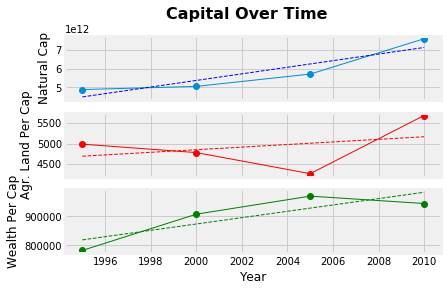

In [408]:
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Capital Over Time", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(usa_year, nat_cap, linewidth=1, marker="o")
ax1.plot(usa_year, nc_fit, "b--", linewidth=1)
ax1.set_ylabel("Natural Cap")


ax2.plot(usa_year, agr_cap, linewidth=1, marker="o", color="r")
ax2.plot(usa_year, ag_fit, "r--", linewidth=1)
ax2.set_ylabel("Agr. Land Per Cap")

ax3.plot(usa_year, wel_cap, linewidth=1, marker="o", color="g")
ax3.plot(usa_year, we_fit, "g--", linewidth=1)
ax3.set_ylabel("Wealth Per Cap")
ax3.set_xlabel("Year")

In [120]:
year = 2020
print("The Natural Capital in 2020 will be " +
      str(nc_slope * year + nc_int) + ".")
print("The Agricultural Land Per Capital in 2020 will be " + str(ag_slope * year + ag_int) + ".")
print("The Wealth Per capital in 2020 will be " +
      str(we_slope * year + we_int) + ".")



The Natural Capital in 2020 will be 8848213686025.0.
The Agricultural Land Per Capital in 2020 will be 5483.868000000002.
The Wealth Per capital in 2020 will be 1092956.114.


In [121]:
year = 2025
print("The Natural Capital in 2025 will be " +
      str(nc_slope * year + nc_int) + ".")
print("The Agricultural Land Per Capital in 2025 will be " + str(ag_slope * year + ag_int) + ".")
print("The Wealth Per capital in 2025 will be " +
      str(we_slope * year + we_int) + ".")

plt.savefig("../Images/USA_Regression.png")

The Natural Capital in 2025 will be 9717507964070.875.
The Agricultural Land Per Capital in 2025 will be 5641.9259999999995.
The Wealth Per capital in 2025 will be 1147725.7430000007.


In [122]:
# Attempted An ova

In [331]:
#data = pd.read_csv('../usa.csv')
#data

,Temperture in C,Natural Capital,Agricutural Land per Capital,Wealth per Capita
0,7.42,4.889032e+12,4986.98,782762.08
1,7.43,5.056682e+12,4782.04,907706.85
2,7.86,5.707171e+12,4268.68,970026.39
3,7.10,7.569850e+12,5684.96,944554.33


In [263]:
# tt test 


In [215]:
temp_means = np.mean(temp)
temp_means
temp_sem = sem(temp)
temp_sem

wealth_means = np.mean(wel_cap)
wealth_means
wealth_sem = sem(wel_cap)
wealth_sem

means = [temp_means, wealth_means]
means
sems = [temp_sem, wealth_sem]
sems

labels = ["Temperatures", "Wealth Capita"]

7.452500000000001

In [216]:
temp_sem = sem(temp)
temp_sem

0.1559580606017743

In [217]:
wealth_means = np.mean(wel_cap)
wealth_means

901262.4125

In [218]:
wealth_sem = sem(wel_cap)
wealth_sem

41519.60811848349

In [214]:
means = [temp_means, wealth_means]
means

[7.452500000000001, 901262.4125]

In [213]:
sems = [temp_sem, wealth_sem]
sems

[0.1559580606017743, 41519.60811848349]

In [211]:
labels = ["Temperatures", "Wealth Capita"]

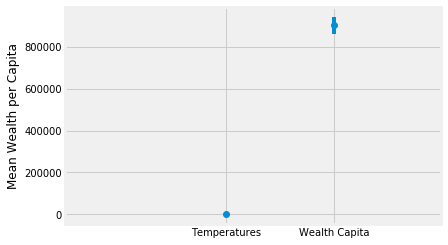

In [253]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o" )

ax.set_xlim(-1.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1, 2,])

ax.set_ylabel('Mean Wealth per Capita')


plt.show()

In [390]:
(t_stat, p) = ttest_ind(temp, wel_cap, equal_var=False)
(t_stat, p)

(-21.70651804587043, 0.00021398924348983036)

In [ ]:
#A large t-score tells you that the groups are different.
#A small t-score tells you that the groups are similar.
#Low p-values are good; They indicate your data did not occur by chance.

In [ ]:
#stats need to use iloc on columns


In [354]:
def summarize(title, arr):
    print(f"Summarizing {title}")
    print(f"Variance: {variance(arr)}")
    print(f"Standard Deviation: {stdev(arr)}")
    print(f"Z-Scores: {zscore(arr)}")
    print("======")

In [355]:
summarize("Temperature", utemp)

Summarizing Temperature
Variance: 0.09729166666666685
Standard Deviation: 0.3119161212035486
Z-Scores: [-0.12031365 -0.08329407  1.50854809 -1.30494037]
